In this file we will look at the output of finding the rates of different binaries after having run the slurm job (on the loss mass COMPAS output)

I will look at both executes of rates of all DCOS+WD and just WD

I will also look at the separations of the mass combinations of the WD+WD systems that merge within a hubble time

In [8]:
# all of the necessary imports
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
from useful_fncs import tgw,WD_BINARY_BOOLS

In [63]:
# reading in the HDF5 file
pathTorates_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/Rate_info_NS.h5' #path of the hdf5 file

Data_rates = h5.File(pathTorates_H5)

In [64]:
list(Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned'].keys())
rates_info = Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']

In [65]:
rates_info.keys()

<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'redshifts']>

In [66]:
display(rates_info['SEED'])
display(rates_info['DCOmask'])
print(sum(rates_info['DCOmask'][()])) # this is summing the trues that are BNS that merged within a hubble time (same as number of SEEDs in this rate info H5 file)
display(rates_info['merger_rate']) #80 redshift bins 
display(rates_info['redshifts'])
print(rates_info['redshifts'][()])

<HDF5 dataset "SEED": shape (19,), type "<u8">

<HDF5 dataset "DCOmask": shape (360,), type "|b1">

19


<HDF5 dataset "merger_rate": shape (19, 80), type "<f8">

<HDF5 dataset "redshifts": shape (80,), type "<f8">

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9]


In [67]:
# reading in the HDF5 file
pathToSM_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/CosmicIntegration/COMPAS_Output_LowMass_1.h5' #path of the hdf5 file

Data_2 = h5.File(pathToSM_H5)

In [68]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_data = pd.DataFrame() # making a pandas dataframe

for key in Data_2["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_data[key] = Data_2["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

In [69]:
dco_mask = rates_info['DCOmask'][()]
merging_NSNS = DCO_data[dco_mask]

In [70]:
print(np.shape(rates_info['merger_rate'][:,0]))

(19,)


In [71]:
merging_NSNS['merger_rate_z0'] = rates_info['merger_rate'][:,0]

/tmp/ipykernel_532773/4163823339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_NSNS['merger_rate_z0'] = rates_info['merger_rate'][:,0]


In [72]:
merging_NSNS

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),merger_rate_z0
15,1,4.748315,0.623930,0,b'2 ',b'4-8 ',1.260126,1.322620,1,0.000323,0,1,1,0,418855,0.004341,13,13,33.649443,0.000126,-1.694017,0.0,0.0,0.000855
23,1,3.162000,0.418140,0,b'2 ',b'4-8 ',1.260180,1.277584,1,0.000511,0,1,1,0,438875,0.002976,13,13,35.372554,0.000180,-1.657328,0.0,0.0,0.004354
29,1,34.065425,0.189972,0,b'4-8 ',b'8 ',1.277719,1.277584,1,0.001198,0,1,1,0,651313,0.004731,13,13,40.497868,0.000135,-1.335271,0.0,0.0,0.057433
60,1,31.483034,0.163235,0,b'5 ',b'8 ',1.277732,1.277584,1,0.004774,0,1,1,0,451628,0.004599,13,13,29.821243,0.000149,-1.317773,0.0,0.0,1.155829
75,1,85.827476,0.459599,0,b'4-8 ',b'8 ',1.277633,1.277584,1,0.000840,0,1,1,0,761020,0.007103,13,13,40.301712,0.000049,-1.432305,0.0,0.0,0.020778
86,1,1563.689829,0.437393,0,b'5 ',b'8 ',1.668267,1.493917,1,0.007143,0,1,1,0,738621,0.016834,13,13,16.502195,0.000020,-1.385497,0.0,0.0,2.550545
153,1,2658.001673,0.583687,0,b'5 ',b'8 ',1.775825,1.613424,1,0.012691,0,1,1,0,519339,0.024207,13,13,14.905412,0.000018,-1.393037,0.0,0.0,5.226306
174,1,2.456000,0.571036,0,b'2-8 ',b'4-8 ',1.260127,1.373905,1,0.000221,0,1,1,0,130780,0.003428,13,13,37.736467,0.000127,-1.747179,0.0,0.0,0.000197
191,1,50.351583,0.156808,0,b'2 ',b'4-8 ',1.260129,1.277584,1,0.006075,0,1,1,0,197130,0.005136,13,13,41.552101,0.000129,-1.262143,0.0,0.0,1.675444
192,1,288.911579,0.511055,0,b'2 ',b'4-8 ',1.260030,1.349386,1,0.016219,0,1,1,0,198500,0.010346,13,13,29.946002,0.000030,-1.355765,0.0,0.0,4.595955


In [73]:
# this is the rate at redhsif zero (check expectations with Ligo paper 2023 - see on their website)
print(sum(merging_NSNS['merger_rate_z0']))

34.758742306206145


Text(0, 0.5, 'dR/dM')

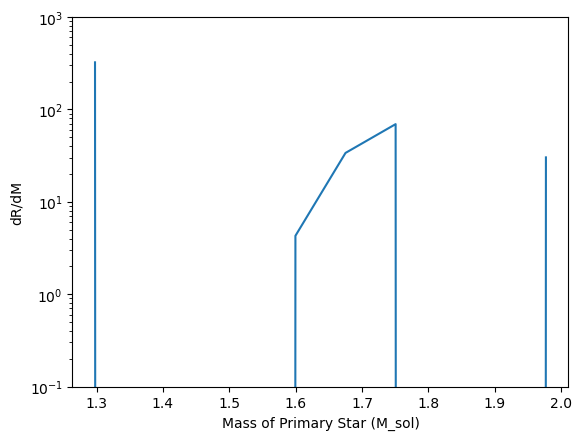

In [74]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_NSNS['Mass(1)'], weights=merging_NSNS['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_NSNS['Mass(1)'], weights=merging_NSNS['merger_rate_z0'])
plt.xlabel("Mass of Primary Star (M_sol)")
plt.yscale('log')
plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM")

#### Doing rates analysis on the h5 file that includes WD in DCO

In [41]:
# reading in the HDF5 file
pathTorates_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/Rate_info_WDWD.h5' #path of the hdf5 file

Data_rates = h5.File(pathTorates_H5)

In [42]:
rates_info = Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']

In [43]:
rates_info.keys()

<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'redshifts']>

In [59]:
# reading in the HDF5 file
pathToweights_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/CosmicIntegration/COMPAS_Output_wWeights_SM_2.h5' #path of the hdf5 file

Data_weights = h5.File(pathToweights_H5)

In [60]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_DCO_WD"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_WD_data[key] = Data_weights["BSE_DCO_WD"][key][()] # adding these columns to the dataframe

In [61]:
# gathering the seeds from the rates.h5 file
dco_mask = rates_info['DCOmask'][()]
merging_all_WD = DCO_WD_data[dco_mask]

In [62]:
print(np.shape(rates_info['merger_rate'][:,0]))

(1,)


In [48]:
# making a new column in the DCO_WD dataset that includes the merger rates at redhsift zero for each system
merging_all_WD['merger_rate_z0'] = rates_info['merger_rate'][:,0]

/tmp/ipykernel_532773/2127216249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_all_WD['merger_rate_z0'] = rates_info['merger_rate'][:,0]


In [49]:
merging_all_WD

,CE_Event_Counter,CE_Event_Counter_new,Coalescence_Time,Coalescence_Time_new,Eccentricity@DCO,Eccentricity@DCO_new,Immediate_RLOF>CE,Immediate_RLOF>CE_new,MT_Donor_Hist(1),MT_Donor_Hist(1)_new,MT_Donor_Hist(2),MT_Donor_Hist(2)_new,Mass(1),Mass(1)_new,Mass(2),Mass(2)_new,Merges_Hubble_Time,Merges_Hubble_Time_new,Metallicity@ZAMS(1),Metallicity@ZAMS(1)_new,Optimistic_CE,Optimistic_CE_new,Record_Type,Record_Type_new,Recycled_NS(1),Recycled_NS(1)_new,Recycled_NS(2),Recycled_NS(2)_new,SEED,SEED_new,SemiMajorAxis@DCO,SemiMajorAxis@DCO_new,Stellar_Type(1),Stellar_Type(1)_new,Stellar_Type(2),Stellar_Type(2)_new,Time,Time_new,mixture_weight,mixture_weight_new,merger_rate_z0
500,1,1,5895.155756,5895.155756,0.0,0.0,1,1,"b""b'3 '""","b""b'3 '""","b""b'NA '""","b""b'NA '""",0.187069,0.187069,0.186506,0.186506,1,1,0.009983,0.009983,0,0,1,1,NaN,NaN,NaN,NaN,30638,30638,0.003932,0.003932,10,10,10,10,3762.543128,3762.543128,10.0,10.0,148.024779


Text(0, 0.5, 'dR/dM (natural log)')

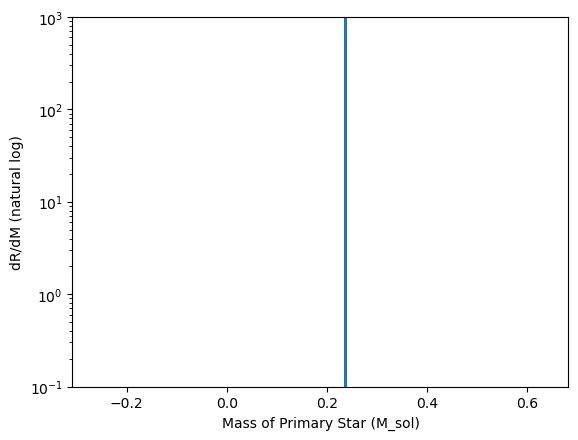

In [50]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel("Mass of Primary Star (M_sol)")
plt.yscale('log')
plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")

Text(0, 0.5, 'dR/dr (natural log)')

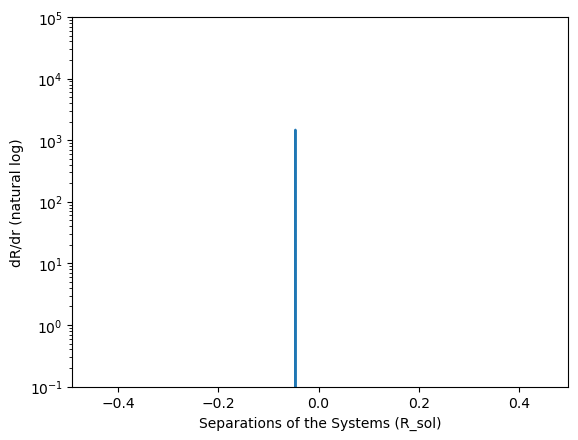

In [53]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_all_WD['SemiMajorAxis@DCO'], weights=merging_all_WD['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel("Separations of the Systems (R_sol)")
plt.yscale('log')
plt.ylim(1e-1,1e5)
plt.ylabel("dR/dr (natural log)")

#### Let's look at different mass combinations of the WD+WD

In [6]:
# let's gather the system parameters group 

SP_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_System_Parameters"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    SP_WD_data[key] = Data_weights["BSE_System_Parameters"][key][()] # adding these columns to the dataframe

In [12]:
SP_WD_data

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,...,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
0,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,1,0,1,0,0.0,1397.530986,0,1.0,10.000000
1,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,10,8,1,1,0.0,2269.769501,0,1.0,10.000000
2,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,0,1,0,0.0,13757.046608,0,1.0,10.000000
3,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,10,11,1,1,0.0,13734.226416,0,1.0,9.999997
4,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,0,1,0,0.0,13782.210927,0,1.0,9.999677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,14187.533754,0,1.0,0.416246
999996,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,13901.519164,0,1.0,0.087445
999997,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,13922.219796,0,1.0,0.122957
999998,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,12,11,1,1,0.0,13772.504859,0,1.0,0.128802


In [79]:
# let's first look at the units of some parameters to see if anything must be converted
SPs_WD = Data_weights['BSE_System_Parameters']
print(SPs_WD['Mass(1)'].attrs['units']) 
print(SPs_WD['SemiMajorAxis'].attrs['units'])
print(SPs_WD['Time'].attrs['units'])

b'Msol'
b'Rsol'
b'Myr'


Let's separate these systems between HeWD and COWD

Text(0, 0.5, 'Stellar Type of Secondary Star')

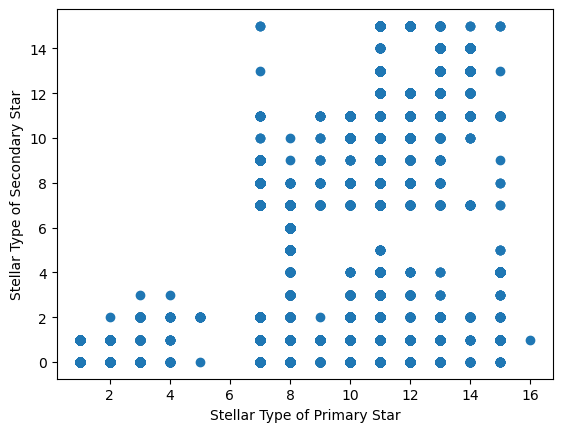

In [11]:
plt.scatter(SP_WD_data['Stellar_Type(1)'],SP_WD_data['Stellar_Type(2)'])
plt.xlabel("Stellar Type of Primary Star")
plt.ylabel("Stellar Type of Secondary Star")

Let's select for stellar types that are just HeWD+HeWD and COWD+COWD

In [15]:
hewd_bool = np.logical_and(SP_WD_data['Stellar_Type(1)']==10,SP_WD_data['Stellar_Type(2)']==10)
HeWD_SYS = SP_WD_data[hewd_bool]

cowd_bool = np.logical_and(SP_WD_data['Stellar_Type(1)']==11,SP_WD_data['Stellar_Type(2)']==11)
COWD_SYS = SP_WD_data[cowd_bool]

In [33]:
pd.set_option('display.max_columns', None)
display(HeWD_SYS)

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
10,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'1-2 ',b'3 ',0.151958,0.368583,1.043763,0.752876,0,0,0.000847,0.000847,0.0,0.0,0,1,10,0.298761,0.020752,3.107600,3.981329,0.520839,0.167425,5.227053,1.412439,1.962806,0.029289,265.0,265.0,30.0,30.0,10,10,1,1,0.0,13727.752620,0,1.0,10.000000
22,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'1-2 ',b'3 ',0.162154,0.355666,1.090745,0.795256,0,0,0.000445,0.000445,0.0,0.0,0,1,22,0.701963,0.481681,4.589909,2.642318,0.801448,0.766222,4.901099,2.129145,0.770953,0.023103,265.0,265.0,30.0,30.0,10,10,1,1,0.0,14175.461919,0,1.0,10.000000
30,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'1-2 ',b'3 ',0.238689,0.293207,1.548304,0.748945,0,0,0.000131,0.000131,0.0,0.0,0,1,30,0.916978,0.380748,1.371349,4.166053,-0.737850,0.425558,4.040477,2.178141,0.067980,0.033741,265.0,265.0,30.0,30.0,10,10,1,1,0.0,14123.471539,0,1.0,10.000000
96,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'2 ',b'3 ',0.260720,0.311271,1.770768,0.985588,0,0,0.000262,0.000262,0.0,0.0,0,1,96,0.475227,0.909502,5.605169,5.134841,0.940344,0.173400,4.413985,0.741895,0.625852,0.023231,265.0,265.0,30.0,30.0,10,10,1,1,0.0,13855.731223,0,1.0,10.000000
227,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'1-2 ',b'3 ',0.139630,0.347064,1.549754,0.795574,0,0,0.007628,0.007628,0.0,0.0,0,1,227,0.100712,0.580568,1.244125,4.035490,-0.096019,0.231576,2.213999,5.186675,0.610771,0.021779,265.0,265.0,30.0,30.0,10,10,1,1,0.0,14039.054848,0,1.0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996624,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'3 ',b'3 ',0.352695,0.160701,1.530994,1.187740,0,0,0.028864,0.028864,0.0,0.0,0,1,996624,0.703588,0.422019,3.515612,4.555529,0.458670,0.441646,2.511381,4.239971,0.132339,0.581196,265.0,265.0,30.0,30.0,10,10,1,1,0.0,13959.581859,0,1.0,1.323704
996799,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'3 ',b'2 ',1.213386,0.189321,1.409476,0.940750,0,0,0.000147,0.000147,0.0,0.0,0,1,996799,0.735834,0.246130,5.701570,1.916567,0.016253,-0.406242,3.527175,5.186424,24.974370,0.584186,265.0,265.0,30.0,30.0,10,10,1,1,0.0,14051.625048,0,1.0,2.196666
998160,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'3 ',b'2 ',1.246230,0.207828,1.391037,0.973051,0,0,0.000225,0.000225,0.0,0.0,0,1,998160,0.899757,0.495734,1.384939,5.106928,-0.274511,0.827289,4.553180,5.070148,28.273689,0.723907,265.0,265.0,30.0,30.0,10,10,1,1,0.0,13728.234944,0,1.0,1.342781
998703,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.460240,0.245960,1.529134,1.185004,1,0,0.005102,0.005102,0.0,0.0,0,1,998703,0.617972,0.019306,3.002741,5.717153,-0.469761,-0.276906,0.582748,1.681535,0.049752,0.840271,265.0,265.0,30.0,30.0,10,10,1,1,0.0,4771.293474,0,1.0,1.512791


Let's look at a histogram of the masses for each setllar binary type

Text(0.5, 1.0, 'The Mass Spectrum of the Primary HeWD')

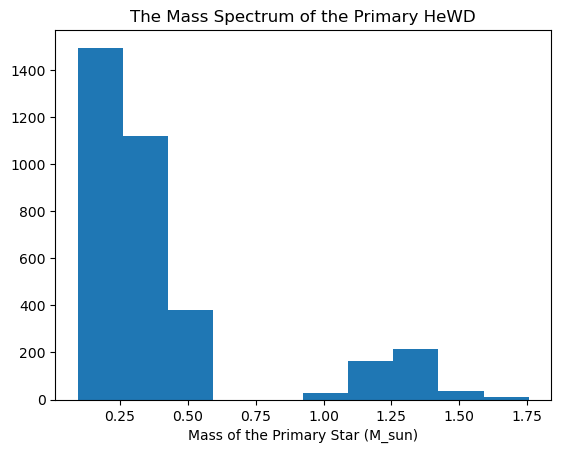

In [19]:
plt.hist(HeWD_SYS['Mass(1)'])
plt.xlabel("Mass of the Primary Star (M_sun)")
plt.title("The Mass Spectrum of the Primary HeWD")

For HeWD, let's separate the mass bins into masses below 0.75 M_sun and above 0.75 Msun

In [23]:
HeWD_SYS_LOWM = HeWD_SYS.loc[HeWD_SYS['Mass(1)']<0.75]
HeWD_SYS_HIGHM = HeWD_SYS.loc[HeWD_SYS['Mass(1)']>0.75]

Text(0.5, 1.0, 'The Mass Spectrum of the Primary COWD')

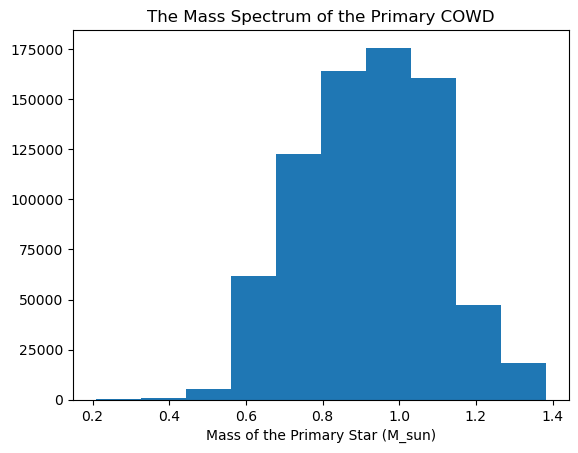

In [20]:
plt.hist(COWD_SYS['Mass(1)'])
plt.xlabel("Mass of the Primary Star (M_sun)")
plt.title("The Mass Spectrum of the Primary COWD")

For COWD, let's separate the mass bins for below 0.9 M_sun and above 0.9 M_sun

In [24]:
COWD_SYS_LOWM = COWD_SYS.loc[COWD_SYS['Mass(1)']<0.9]
COWD_SYS_HIGHM = COWD_SYS.loc[COWD_SYS['Mass(1)']>0.9]

#### Within these bins let's look at what secondary mass is most common

Text(0.5, 1.0, 'The Mass Spectrum of the Secondary HeWD (within M1<0.75)')

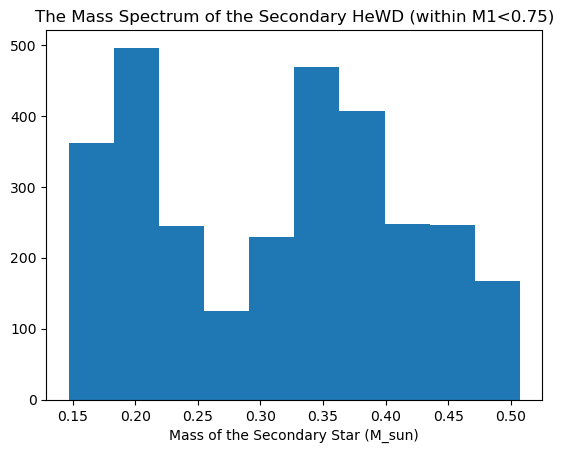

In [25]:
# this is the mass distirbution of the secondary mass of the low primary HeWD masses
plt.hist(HeWD_SYS_LOWM['Mass(2)'])
plt.xlabel("Mass of the Secondary Star (M_sun)")
plt.title("The Mass Spectrum of the Secondary HeWD (within M1<0.75)")

Text(0.5, 1.0, 'The Mass Spectrum of the Secondary HeWD (within M1>0.75)')

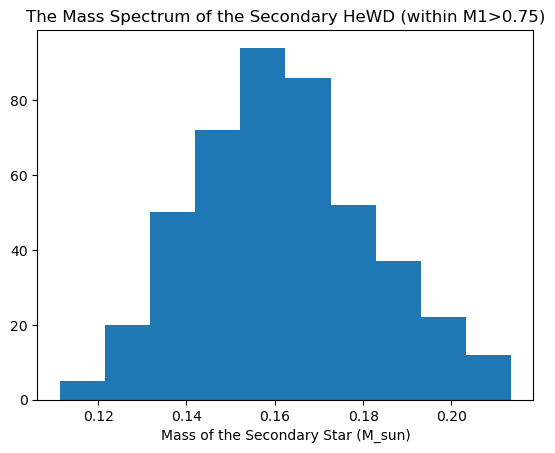

In [26]:
# this is the mass distirbution of the secondary mass of the low primary HeWD masses
plt.hist(HeWD_SYS_HIGHM['Mass(2)'])
plt.xlabel("Mass of the Secondary Star (M_sun)")
plt.title("The Mass Spectrum of the Secondary HeWD (within M1>0.75)")

Text(0.5, 1.0, 'The Mass Spectrum of the Secondary COWD (within M1<0.9)')

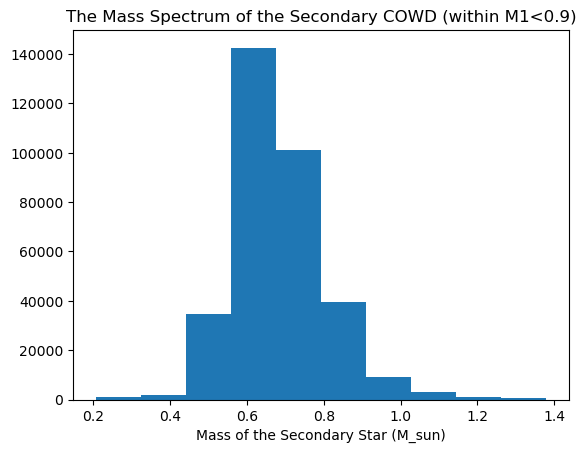

In [28]:
# this is the mass distirbution of the secondary mass of the low primary HeWD masses
plt.hist(COWD_SYS_LOWM['Mass(2)'])
plt.xlabel("Mass of the Secondary Star (M_sun)")
plt.title("The Mass Spectrum of the Secondary COWD (within M1<0.9)")

Text(0.5, 1.0, 'The Mass Spectrum of the Secondary COWD (within M1>0.9)')

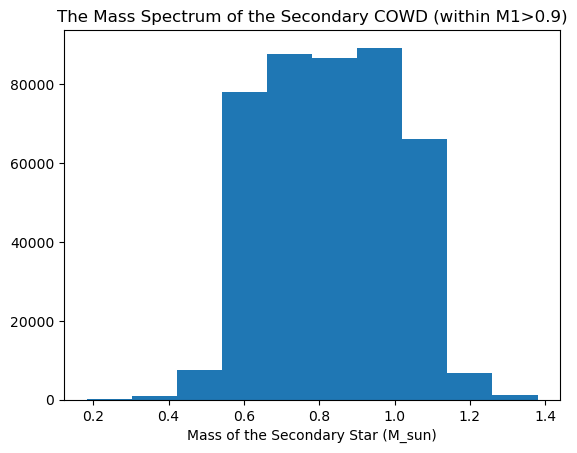

In [29]:
# this is the mass distirbution of the secondary mass of the low primary HeWD masses
plt.hist(COWD_SYS_HIGHM['Mass(2)'])
plt.xlabel("Mass of the Secondary Star (M_sun)")
plt.title("The Mass Spectrum of the Secondary COWD (within M1>0.9)")

So the results seem like likely couples:

HeWD:
- Mass(1)<0.75 + Mass(2) ~ 0.2 or Mass(2) ~ 0.35
- Mass(1)>0.75 + Mass(2) ~ 0.16

COWD:
- Mass(1)<0.9 + Mass(2) ~ 0.6 - 0.7
- Mass(1)>0.9 + Mass(2) ~ 0.7 - 1

Let's slice the data even more to look at the separations that would be needed for these stars to lead to a GW merger

In [32]:
# selecting the common secondary mass ranges for the HeWDs
HeWD_LOWM_SEP = HeWD_SYS_LOWM.loc[np.logical_or(np.logical_and(HeWD_SYS_LOWM['Mass(2)']>=0.33,HeWD_SYS_LOWM['Mass(2)']<=0.37),np.logical_and(HeWD_SYS_LOWM['Mass(2)']>=0.14,HeWD_SYS_LOWM['Mass(2)']<=0.23))]
HeWD_HIGHM_SEP = HeWD_SYS_HIGHM.loc[np.logical_and(HeWD_SYS_HIGHM['Mass(2)']>=0.15,HeWD_SYS_HIGHM['Mass(2)']<=0.17)]

# selecting the common secondary mass ranges for the COWDs
COWD_LOWM_SEP = COWD_SYS_LOWM.loc[np.logical_and(COWD_SYS_LOWM['Mass(2)']>=0.6,COWD_SYS_LOWM['Mass(2)']<=0.7)]
COWD_HIGHM_SEP = COWD_SYS_HIGHM.loc[np.logical_and(COWD_SYS_HIGHM['Mass(2)']>=0.6,COWD_SYS_HIGHM['Mass(2)']<=1.1)]



Text(0.5, 0, 'Separation (R_sun)')

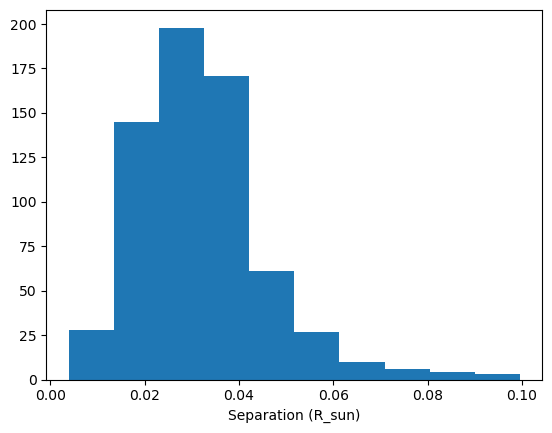

In [86]:
# this is the separation distirbution of the lower primary mass1 HeWD

low_sep = HeWD_LOWM_SEP[HeWD_LOWM_SEP['SemiMajorAxis']<0.1]
plt.hist(low_sep['SemiMajorAxis'])
plt.xlabel("Separation (R_sun)")

Text(0.5, 1.0, 'The Separation Spectrum of the HeWD Binary (0.15<M2>0.17)')

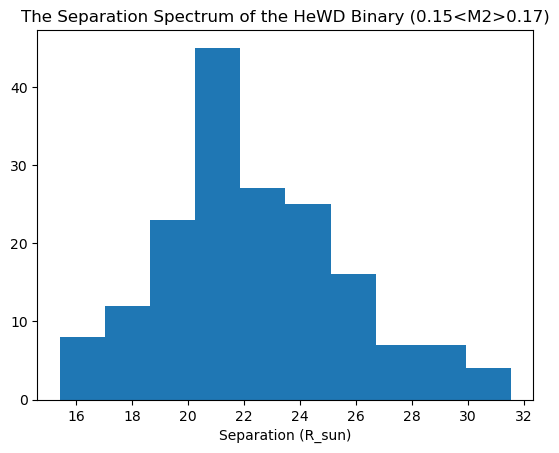

In [37]:
plt.hist(HeWD_HIGHM_SEP['SemiMajorAxis'])
plt.xlabel("Separation (R_sun)")
plt.title("The Separation Spectrum of the HeWD Binary (0.15<M2>0.17)")

Text(0.5, 1.0, 'The Separation Spectrum of the COWD Binary (0.6<M2>0.7)')

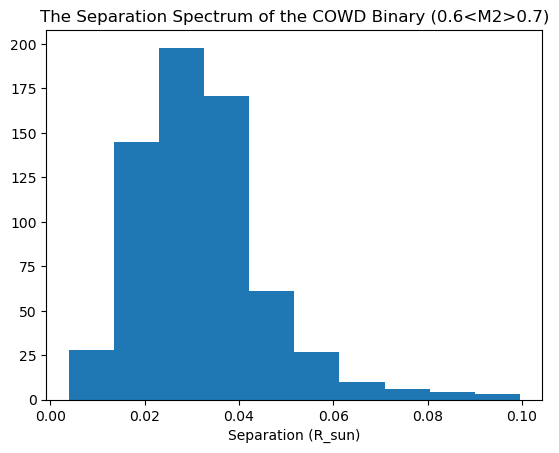

In [87]:
low_sep = HeWD_LOWM_SEP[HeWD_LOWM_SEP['SemiMajorAxis']<0.1]

plt.hist(low_sep['SemiMajorAxis'])
plt.xlabel("Separation (R_sun)")
plt.title("The Separation Spectrum of the COWD Binary (0.6<M2>0.7)")

Text(0.5, 1.0, 'The Separation Spectrum of the COWD Binary (0.6<M2>1.1)')

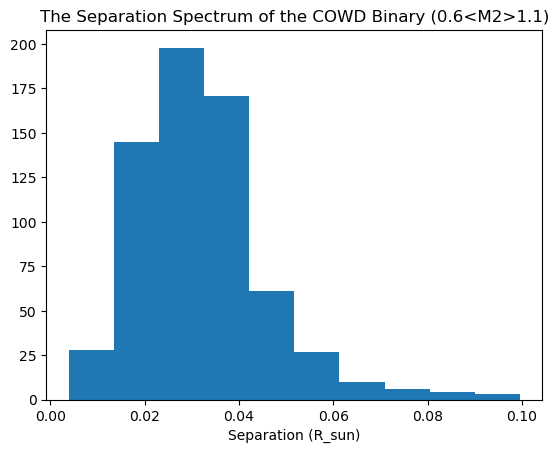

In [88]:
high_sep = HeWD_LOWM_SEP[HeWD_LOWM_SEP['SemiMajorAxis']<0.1]

plt.hist(high_sep['SemiMajorAxis'])
plt.xlabel("Separation (R_sun)")
plt.title("The Separation Spectrum of the COWD Binary (0.6<M2>1.1)")